In [2]:
# https://yt-project.org/
# Import the shiiiii

import yt
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from FLASH_functions import *
sys.path.append('../analysis_scripts')
from real_units_to_sim import get_osiris_units

# Assuming the correct numerical values are input into the file real_units_to sim, this should spit out the correct simulation values 
osiris = get_osiris_units()

## First, let's just take a look at some slices of the data

In [3]:
# plot_path = "./OSIRIS_transfer/MAGOFF/MagShockZ_hdf5_plt_cnt_0004"
plot_path = "./OSIRIS_transfer/MAGON/MagShockZ_hdf5_chk_0005"

ds = yt.load(plot_path)
list(ds.fields.flash)

yt : [INFO     ] 2024-08-20 15:00:50,068 Particle file found: MagShockZ_hdf5_chk_0005
yt : [INFO     ] 2024-08-20 15:00:50,112 Parameters: current_time              = 1.8520020414484505e-09
yt : [INFO     ] 2024-08-20 15:00:50,113 Parameters: domain_dimensions         = [288 272 288]
yt : [INFO     ] 2024-08-20 15:00:50,113 Parameters: domain_left_edge          = [-0.6   -0.075 -0.6  ]
yt : [INFO     ] 2024-08-20 15:00:50,114 Parameters: domain_right_edge         = [0.6 1.  0.6]
yt : [INFO     ] 2024-08-20 15:00:50,115 Parameters: cosmological_simulation   = 0


[On-Disk Field ('flash', 'absr'): (units: '', display_name: 'Absorption Coefficient'),
 On-Disk Field ('flash', 'cham'): (units: '', display_name: 'Chamber Material Fraction'),
 On-Disk Field ('flash', 'cond'): (units: '', display_name: 'Conductivity'),
 On-Disk Field ('flash', 'dbgs'): (units: '', display_name: 'Debug for Shocks'),
 On-Disk Field ('flash', 'dens'): (units: 'code_mass/code_length**3'),
 On-Disk Field ('flash', 'depo'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'dfcf'): (units: '', display_name: 'Diffusion Equation Scalar'),
 On-Disk Field ('flash', 'divb'): (units: 'code_magnetic/code_length'),
 On-Disk Field ('flash', 'eele'): (units: 'code_mass * (code_length/code_time)**2', display_name: 'Electron Internal Specific Energy'),
 On-Disk Field ('flash', 'eint'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'eion'): (units: 'code_mass * (code_length/code_time)**2', display_name: 'Ion Internal Specific Energy'),
 On-Disk Field ('

In [4]:
# relevant vars

print(ds.units)
print(ds.length_unit)
print(ds.mass_unit)
print(ds.domain_dimensions)
print(ds.refine_by)

1.0 cm
1.0 g
[288 272 288]
2


yt : [INFO     ] 2024-08-20 15:00:51,610 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-20 15:00:51,611 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-20 15:00:51,612 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-20 15:00:51,613 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-20 15:00:51,615 Making a fixed resolution buffer of (('flash', 'dens')) 800 by 800


dens at [0.  0.4 0. ] code_length: [2.48007124e-05] code_mass/code_length**3



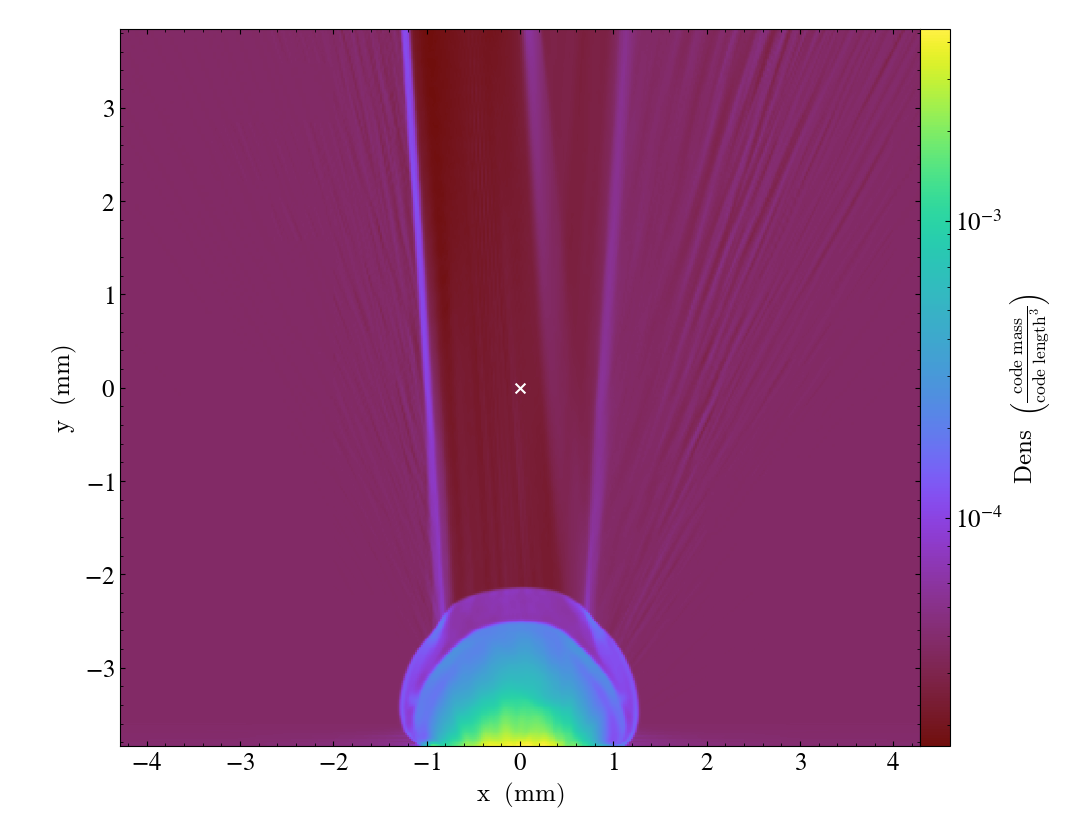

In [5]:
# Find some points in the background to pull values from

# background_pt = [-0.4, 0.3, 0.0]
background_pt = [0, 0.4, 0.0]

rho_0 = pull_value_at_coord(background_pt,'dens',ds)

# looks good

In [6]:
# perform appropriate conversions to get the number density of ions and electrons

def make_ion_number_density(field, data):
    avogadro = 6.022e23
    ion_number_density = avogadro*data["flash","dens"]*data["flash","sumy"]
    return ion_number_density

def make_electron_number_density(field, data):
    avogadro = 6.022e23
    electron_number_density = avogadro*data["flash","dens"]*data["flash","ye"]
    return electron_number_density

ds.add_field(("flash", "idens"), function=make_ion_number_density, units="code_mass/code_length**3",sampling_type="cell") # technically the units are wrong here, should be massless
ds.add_field(("flash", "edens"), function=make_electron_number_density, units="code_mass/code_length**3",sampling_type="cell") # same here

yt : [INFO     ] 2024-08-20 15:00:52,297 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-20 15:00:52,298 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-20 15:00:52,299 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-20 15:00:52,300 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-20 15:00:52,301 Making a fixed resolution buffer of (('flash', 'edens')) 800 by 800


edens at [0.  0.4 0. ] code_length: [7.19624975e+18] code_mass/code_length**3



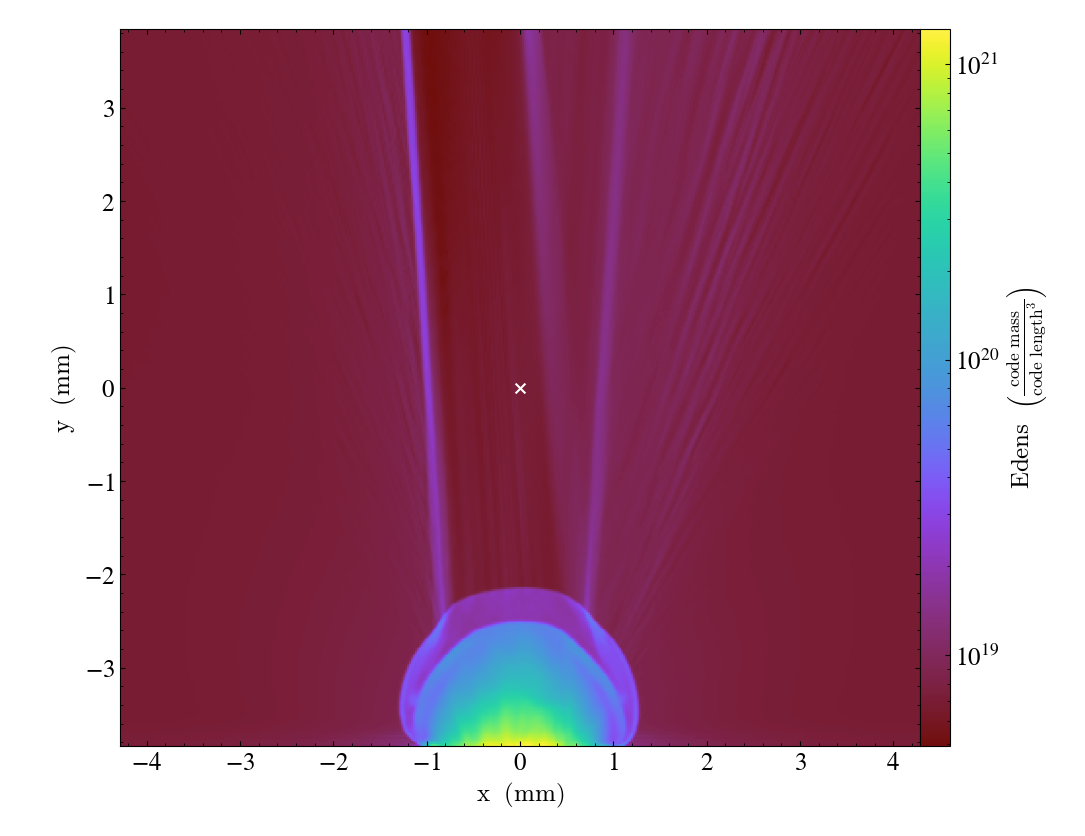

yt : [INFO     ] 2024-08-20 15:00:52,894 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-20 15:00:52,895 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-20 15:00:52,897 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-20 15:00:52,898 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-20 15:00:52,899 Making a fixed resolution buffer of (('flash', 'idens')) 800 by 800


idens at [0.  0.4 0. ] code_length: [5.53557785e+17] code_mass/code_length**3



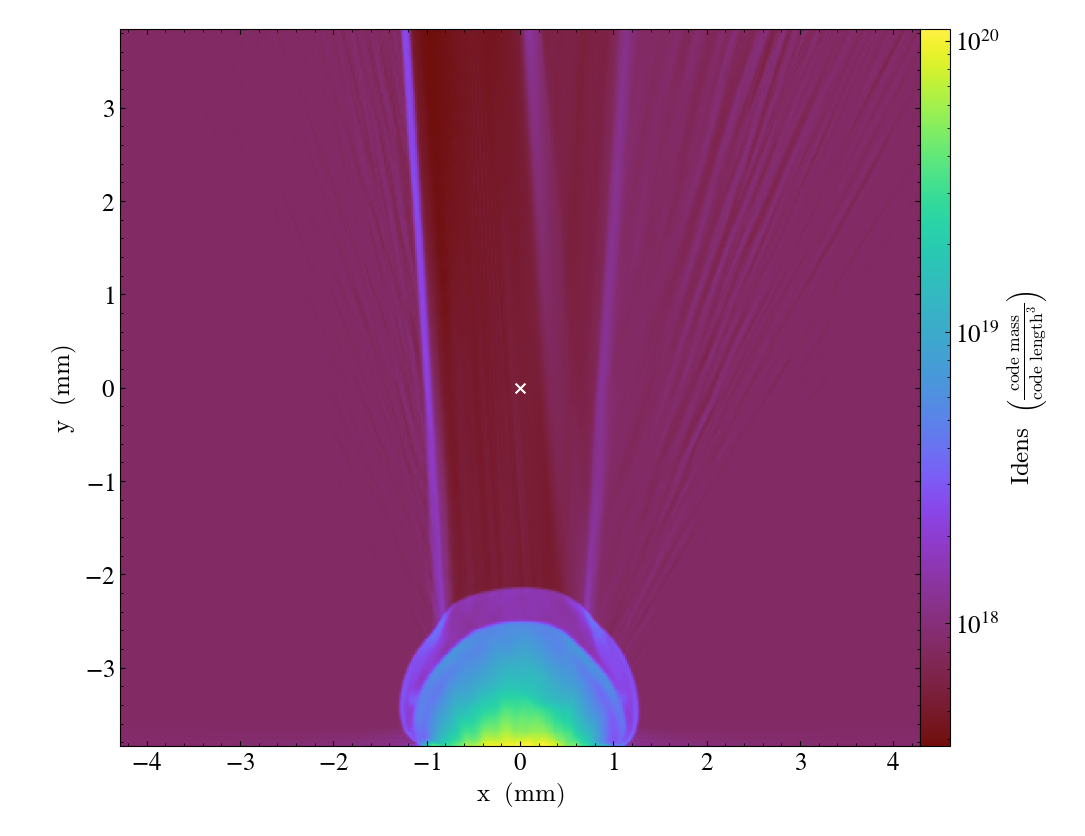

In [7]:
# background_pt = [-0.3, 0.12, 0.0]

ne_0 = pull_value_at_coord(background_pt,'edens',ds)
ni_0 = pull_value_at_coord(background_pt,'idens',ds)

yt : [INFO     ] 2024-08-20 15:49:25,429 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-20 15:49:25,430 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-20 15:49:25,434 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-20 15:49:25,434 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-20 15:49:25,436 Making a fixed resolution buffer of (('flash', 'sumy')) 800 by 800


sumy at [0.    0.175 0.   ] code_length: [0.03706449] dimensionless



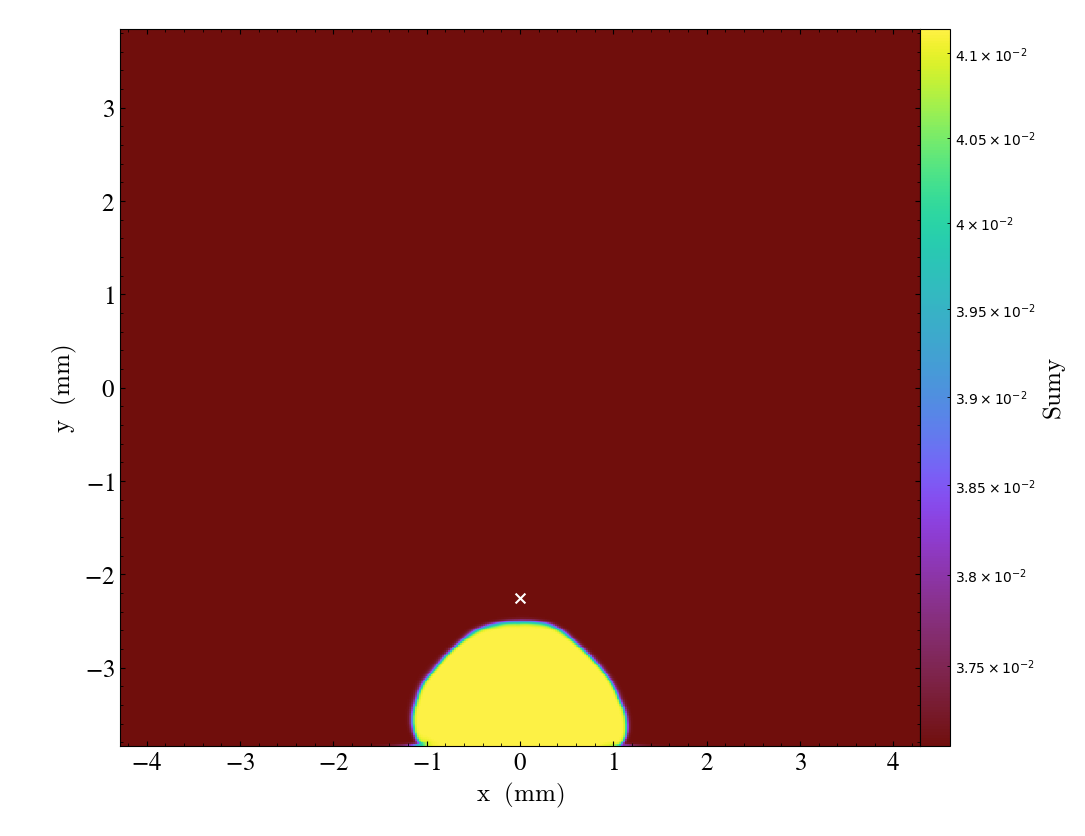

In [55]:
ye = pull_value_at_coord([0,0.175,0], "sumy",ds)

Get alfven speed from the value of background B field in simulation

### $v_a = \frac{B}{\sqrt{4 \pi \rho}}$

yt : [INFO     ] 2024-08-20 15:00:53,971 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-20 15:00:53,972 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-20 15:00:53,973 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-20 15:00:53,974 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-20 15:00:53,974 Making a fixed resolution buffer of (('flash', 'magx')) 800 by 800


magx at [0.  0.4 0. ] code_length: [110226.77212444] code_magnetic



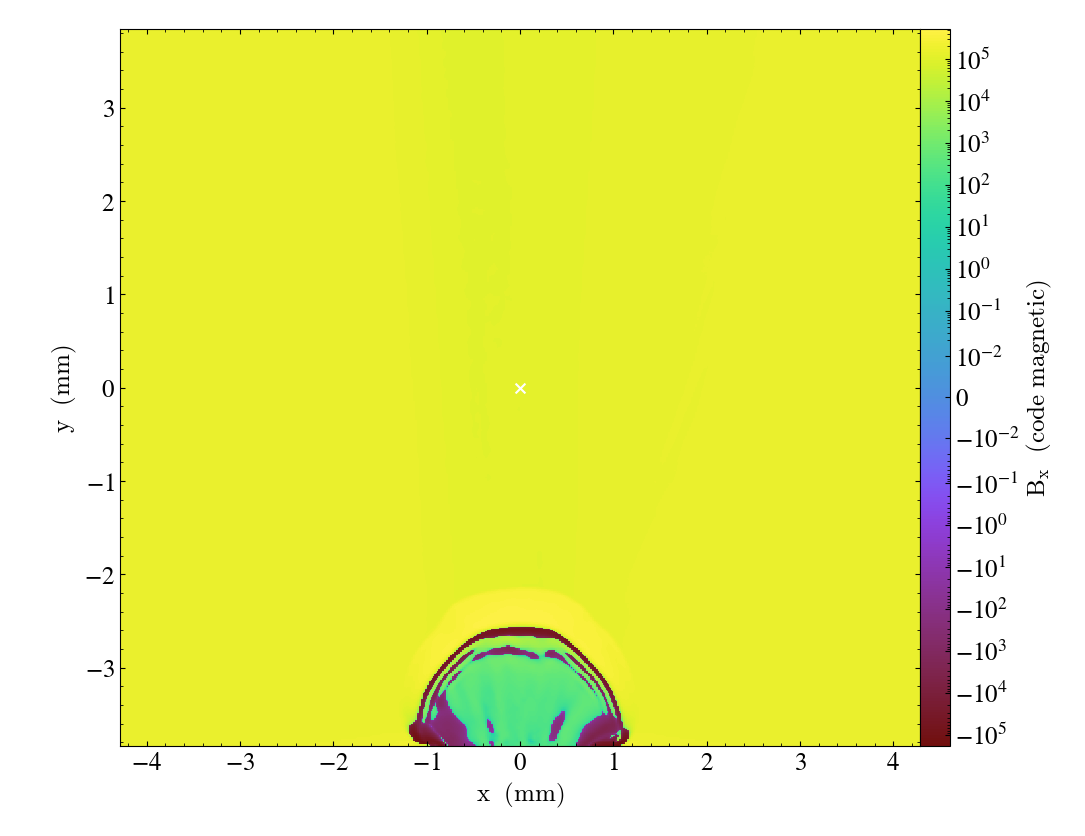

[6243815.75668848] code_length**(3/2)*code_magnetic/sqrt(code_mass)


In [9]:
Bx_0 = pull_value_at_coord(background_pt,'magx',ds)

v_alfven = Bx_0/np.sqrt(4*np.pi*rho_0)
print(v_alfven)

### Though it isn't visible in the above plot, there is actually a channel in the background magnetic field due to the incident laser

yt : [INFO     ] 2024-08-20 15:00:54,964 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-20 15:00:54,965 ylim = 0.062500 1.137500
yt : [INFO     ] 2024-08-20 15:00:54,967 xlim = -0.600000 0.600000


yt : [INFO     ] 2024-08-20 15:00:54,968 ylim = 0.062500 1.137500
yt : [INFO     ] 2024-08-20 15:00:54,968 Making a fixed resolution buffer of (('flash', 'magx')) 800 by 800



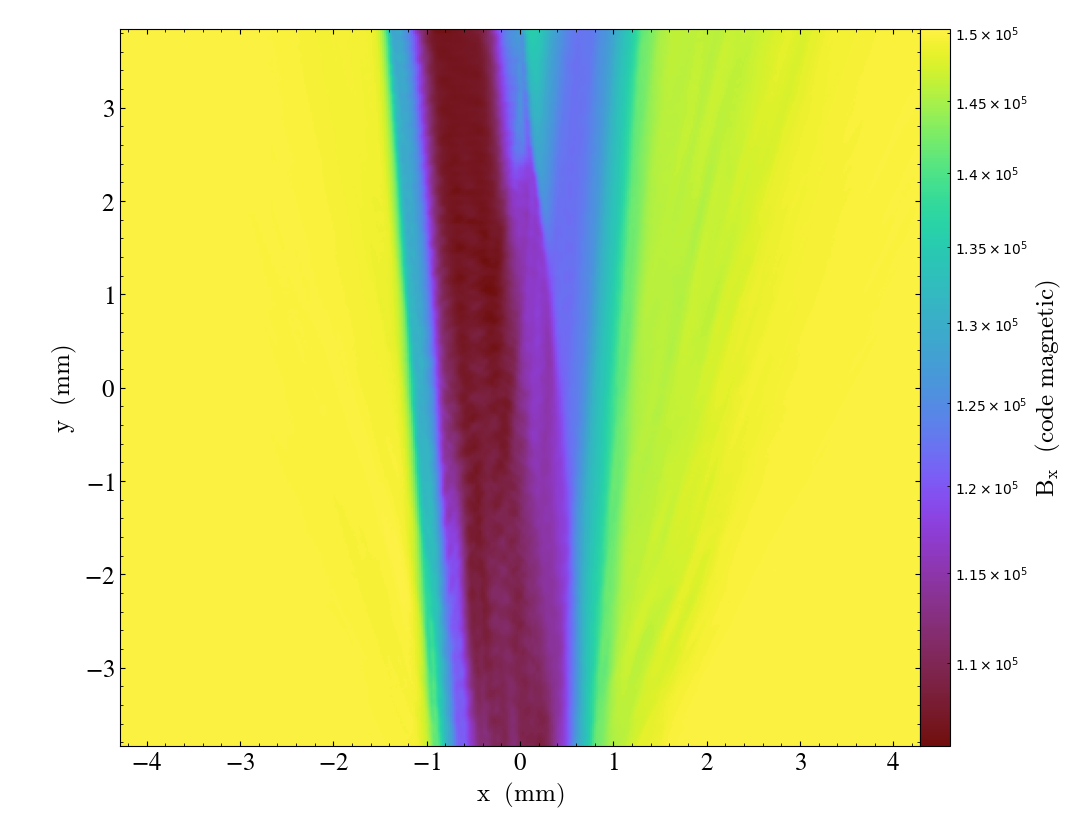

In [10]:
slc = yt.SlicePlot(ds, "z", "magx",center=[0,.6,0]).zoom(1.4)
slc.show()

Text(0, 0.5, 'Number Density [$cm^{-3}$]')

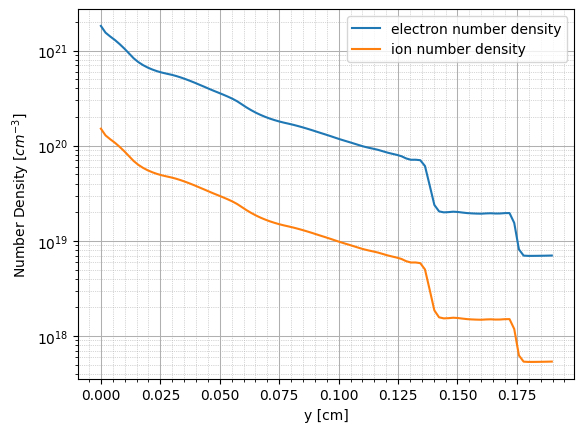

In [53]:
# Take a lineout of the number density to find where the target ends and where the piston begins
start_pt = (0.0,0.01,0.0)
end_pt = (0.0,0.2,0.0)
ray = ds.ray(start_pt, end_pt)

length_of_ray = np.sqrt((end_pt[0]-start_pt[0])**2 + (end_pt[1]-start_pt[1])**2 + (end_pt[2]-start_pt[2])**2)

ray_sort = np.argsort(ray["t"])
dist = np.array(ray[('t')]*length_of_ray)







y = np.array(ray[('flash','y')][ray_sort])
idens = np.array(ray[('flash','idens')][ray_sort])

edens = np.array(ray[('flash','edens')][ray_sort])
plt.semilogy(dist, edens, label='electron number density')
plt.semilogy(dist, idens, label='ion number density')
plt.legend()

from transform import pretty_plot
pretty_plot()


plt.xlabel('y [cm]')
plt.ylabel(r'Number Density [$cm^{-3}$]')
# based on this plot, it looks like the piston begins at y = 0.01

# print(edens[-200])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mach number is between [3.69581088] sqrt(code_mass)/(code_length**(3/2)*code_magnetic) and [17.17601614] sqrt(code_mass)/(code_length**(3/2)*code_magnetic)


Text(0.5, 1.0, 'Velocity distribution of piston')

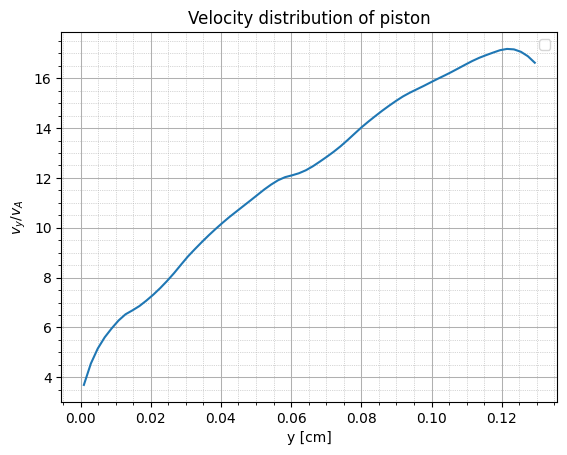

In [56]:
piston_ray = ds.ray((0, 0.01, 0), (0, .14, 0))
vely = np.array(piston_ray[('flash','vely')])
piston = np.array(piston_ray[('flash','y')])-0.01

plt.plot(piston, vely/v_alfven)
pretty_plot()
plt.legend()


mach_number_max = np.max(vely)/v_alfven
mach_number_min = np.min(vely)/v_alfven


print(f"mach number is between {mach_number_min} and {mach_number_max}")

plt.xlabel('y [cm]')
plt.ylabel(r'$v_y/v_A$')

plt.title('Velocity distribution of piston')
# plt.hlines(v_alfven, 0, 0.15, label='Alfven speed')

yt : [INFO     ] 2024-08-20 15:52:04,102 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-20 15:52:04,103 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-20 15:52:04,105 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-20 15:52:04,106 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-20 15:52:04,106 Making a fixed resolution buffer of (('flash', 'tion')) 800 by 800


tion at [0.  0.4 0. ] code_length: [1436956.15327951] code_temperature



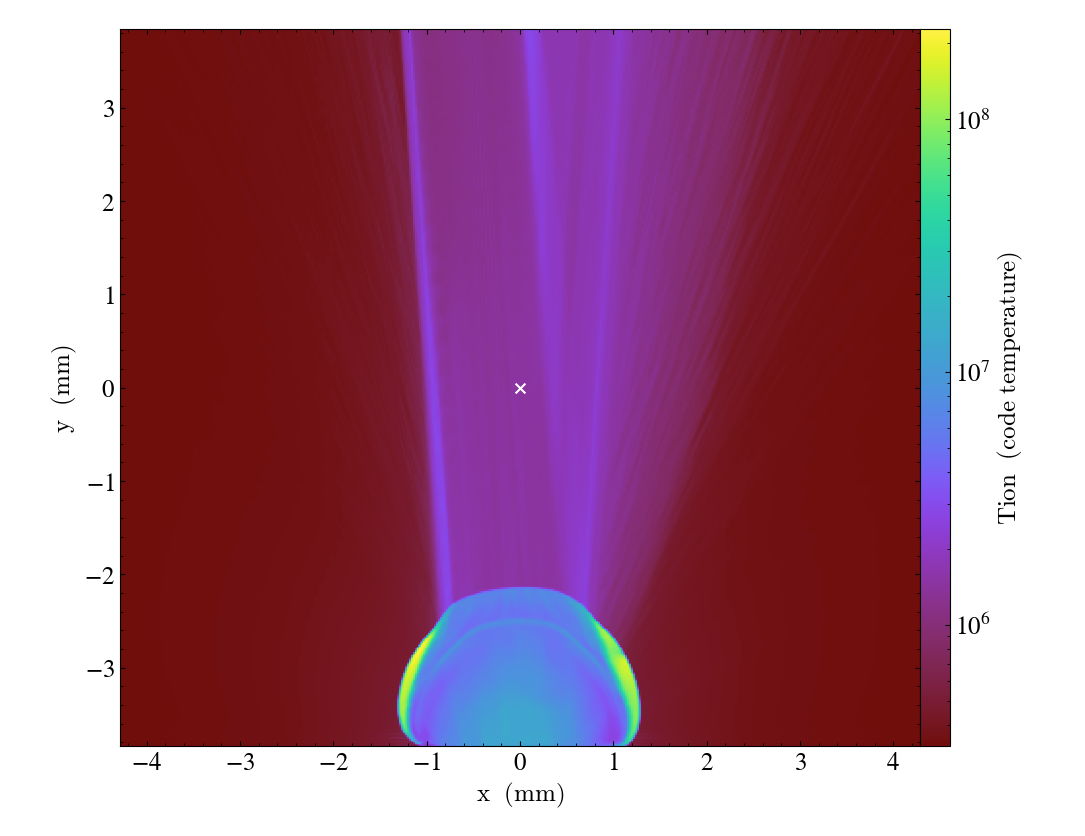

yt : [INFO     ] 2024-08-20 15:52:04,537 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-20 15:52:04,537 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-20 15:52:04,539 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-20 15:52:04,540 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-20 15:52:04,540 Making a fixed resolution buffer of (('flash', 'tele')) 800 by 800


tele at [0.  0.4 0. ] code_length: [12974580.64146048] code_temperature



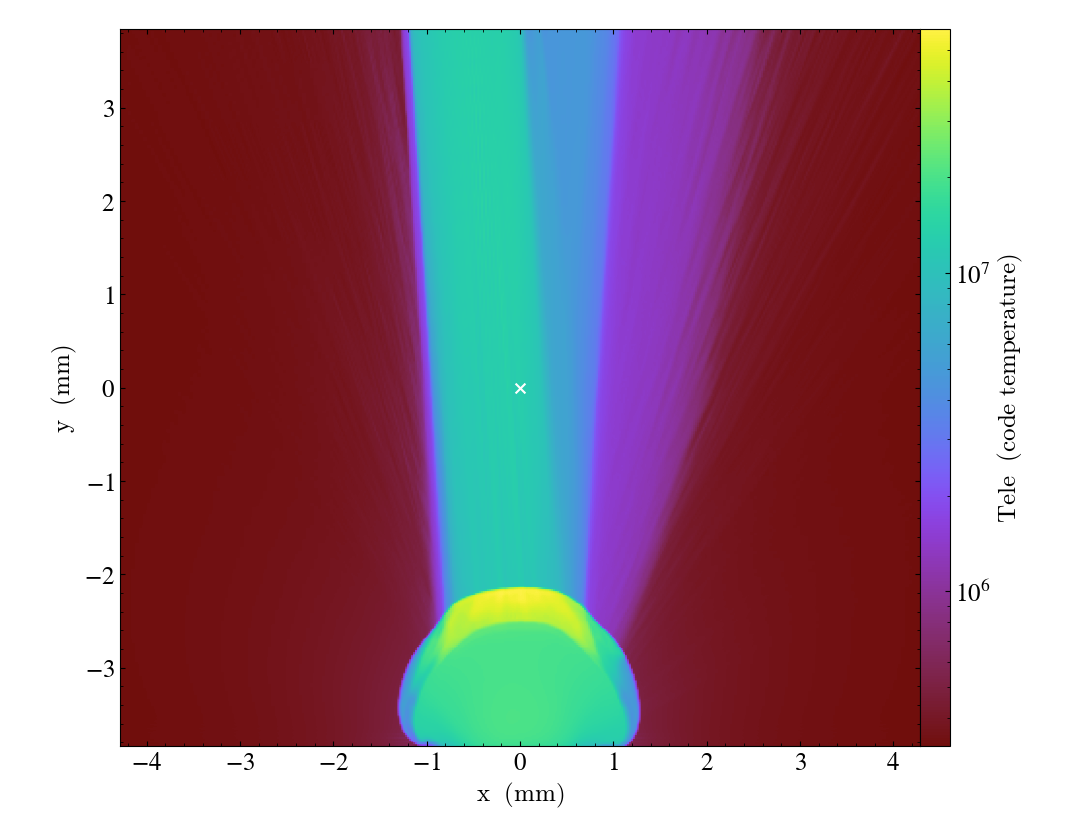

[-0.88924835] dimensionless


In [57]:
Ti_0 = pull_value_at_coord(background_pt,'tion',ds)

Te_0 = pull_value_at_coord(background_pt,'tele',ds)

print((Ti_0 - Te_0)/Te_0) # looks like the temperature difference is around 88%

## Now, start making (throwing) fits!

coefficients for the polynomial fit: [ 8.97660169e+04 -4.55320162e+05  9.63149790e+05 -1.09276428e+06
  7.07207161e+05 -2.50700741e+05  3.73801346e+04  2.75359876e+03
 -1.70856622e+03  2.47238650e+02] 



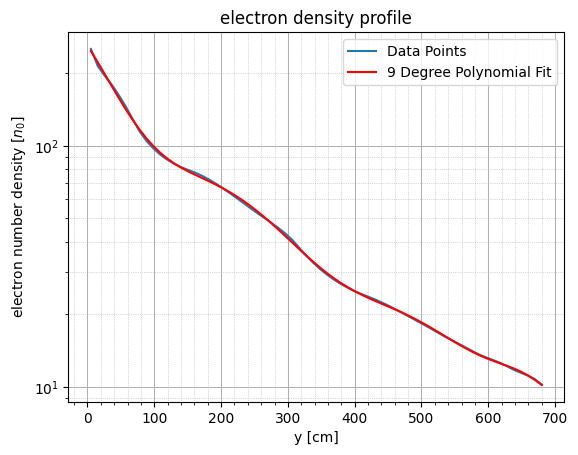

(89766.016850)*((x1 - 5.047839)/675.057876)^(9) + (-455320.162419)*((x1 - 5.047839)/675.057876)^(8) + (963149.790190)*((x1 - 5.047839)/675.057876)^(7) + (-1092764.276707)*((x1 - 5.047839)/675.057876)^(6) + (707207.161071)*((x1 - 5.047839)/675.057876)^(5) + (-250700.740516)*((x1 - 5.047839)/675.057876)^(4) + (37380.134649)*((x1 - 5.047839)/675.057876)^(3) + (2753.598764)*((x1 - 5.047839)/675.057876)^(2) + (-1708.566215)*((x1 - 5.047839)/675.057876)^(1) + (247.238650)*((x1 - 5.047839)/675.057876)^(0)",
(89766.016850)*((x - 5.047839)/675.057876)^9 + (-455320.162419)*((x - 5.047839)/675.057876)^8 + (963149.790190)*((x - 5.047839)/675.057876)^7 + (-1092764.276707)*((x - 5.047839)/675.057876)^6 + (707207.161071)*((x - 5.047839)/675.057876)^5 + (-250700.740516)*((x - 5.047839)/675.057876)^4 + (37380.134649)*((x - 5.047839)/675.057876)^3 + (2753.598764)*((x - 5.047839)/675.057876)^2 + (-1708.566215)*((x - 5.047839)/675.057876)^1 + (247.238650)*((x - 5.047839)/675.057876)^0


In [59]:
# Try fitting to a polynomial instead of an exponential

# If you want to fit it to something useful by osiris, you need to first convert your y axis to omega_pe
degree = 9
precision = 6
piston = np.array(piston_ray[('flash','y')])-0.01
piston = piston/osiris['length']
piston_norm = (piston - piston[0])/(piston[-1]-piston[0])

field_ray = np.array(piston_ray[('flash','edens')])/ne_0.value # ask derek about this
coefficients = np.polyfit(piston_norm, field_ray, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(piston_norm)

# Plot the original data points
plt.semilogy(piston_norm*(piston[-1]-piston[0])+piston[0], field_ray, label='Data Points')

# Plot the polynomial fit
plt.semilogy(piston_norm*(piston[-1]-piston[0])+piston[0], y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel('y')
pretty_plot()

plt.legend()

print(f"coefficients for the polynomial fit: {coefficients} \n")



plt.ylabel('electron number density [$n_0$]')
plt.xlabel('y [cm]')
plt.title('electron density profile')
plt.show()

# Find the x-values where the polynomial fit reaches zero
zero_points = np.roots(coefficients)
real_zero_points = zero_points[np.isreal(zero_points)].real
selected_zero_points = real_zero_points[np.isclose(polynomial_function(real_zero_points), 1)]



# OSIRIS FORMATTING
result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_positional(coefficients[i], precision=precision, sign=False)})*((x1 - {round(piston[0],precision)})/{round(piston[-1]-piston[0],precision)})^("+str(degree-i) + ") +"
print(f"{result.strip(' +')}\",")

# DESMOS FORMATTING
result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_positional(coefficients[i],precision)})*((x - {round(piston[0],precision)})/{round(piston[-1]-piston[0],precision)})^"+str(degree-i) + " +"
print(result.strip(' +'))

In [17]:
for i in range(len(piston)):
    print(f"x({i+1},1) = {piston[i]},")
    print(f"fx({i+1},1) = {field_ray[i]},")

x(1,1) = 5.047838855162069,
fx(1,1) = 252.028061581744,
x(2,1) = 15.433344633725168,
fx(2,1) = 214.06690788001197,
x(3,1) = 25.818850412288267,
fx(3,1) = 195.07774896837512,
x(4,1) = 36.20435619085138,
fx(4,1) = 179.22893470777288,
x(5,1) = 46.58986196941448,
fx(5,1) = 162.46372597259275,
x(6,1) = 56.97536774797756,
fx(6,1) = 145.80059363712488,
x(7,1) = 67.36087352654066,
fx(7,1) = 129.56174061205473,
x(8,1) = 77.74637930510376,
fx(8,1) = 115.0719743017512,
x(9,1) = 88.13188508366686,
fx(9,1) = 104.89578130134531,
x(10,1) = 98.51739086222996,
fx(10,1) = 97.55694594407659,
x(11,1) = 108.90289664079306,
fx(11,1) = 91.92289114858166,
x(12,1) = 119.28840241935616,
fx(12,1) = 87.64403946958483,
x(13,1) = 129.67390819791922,
fx(13,1) = 84.21357724650433,
x(14,1) = 140.05941397648238,
fx(14,1) = 81.53762029374214,
x(15,1) = 150.44491975504542,
fx(15,1) = 79.39195454488623,
x(16,1) = 160.83042553360855,
fx(16,1) = 77.42230724788021,
x(17,1) = 171.21593131217162,
fx(17,1) = 75.1344617465701,
x

coefficients for the polynomial fit: [-6.82711882e-19  1.89628406e-15 -2.04867894e-12  1.03716455e-09
 -1.99751376e-07 -2.74452907e-05  1.89775678e-02 -3.28652659e+00
  2.85931135e+02] 



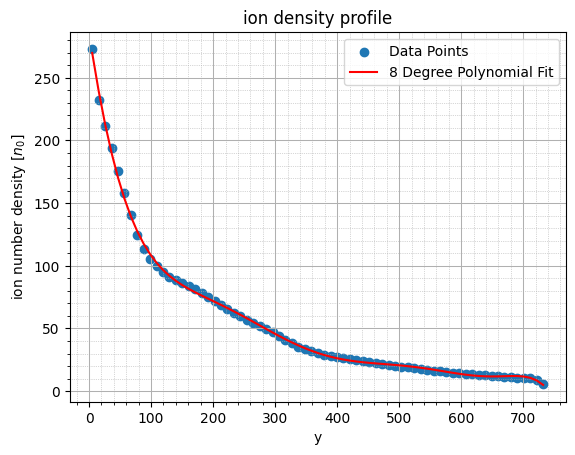

roots at [ 741.17571586 -258.9704686 ]
if(x1 < -258.97,
(-6.8271e-19)*x1^8 + (1.8963e-15)*x1^7 + (-2.0487e-12)*x1^6 + (1.0372e-09)*x1^5 + (-1.9975e-07)*x1^4 + (-2.7445e-05)*x1^3 + (1.8978e-02)*x1^2 + (-3.2865e+00)*x1^1 + (2.8593e+02)*x1^0, 0)


In [18]:
# Try fitting to a polynomial instead of an exponential

# If you want to fit it to something useful by osiris, you need to first convert your y axis to omega_pe
degree = 8

piston = np.array(piston_ray[('flash','y')])-0.01
piston = piston/osiris['length']
field_ray = np.array(piston_ray[('flash','idens')])/ni_0.value # ask derek about this
coefficients = np.polyfit(piston, field_ray, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(piston)

# Plot the original data points
plt.scatter(piston, field_ray, label='Data Points')

# Plot the polynomial fit
plt.plot(piston, y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel('y')
pretty_plot()

plt.legend()

print(f"coefficients for the polynomial fit: {coefficients} \n")



plt.ylabel('ion number density [$n_0$]')
plt.title('ion density profile')
plt.show()

# Find the x-values where the polynomial fit reaches zero
zero_points = np.roots(coefficients)

# Filter out the complex roots and keep only the real roots
real_zero_points = zero_points[np.isreal(zero_points)].real

print(f'roots at {real_zero_points}')

print(f"if(x1 < {round(real_zero_points[1],3)},")
result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_scientific(coefficients[i],4)})*x1^"+str(degree-i) + " +"
print(f"{result.strip(' +')}, 0)")


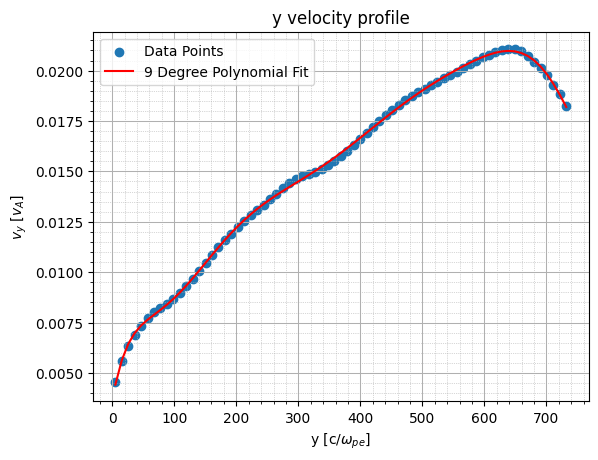

"(3.0561e-25)*x1^9 + (-1.0900e-21)*x1^8 + (1.6388e-18)*x1^7 + (-1.3491e-15)*x1^6 + (6.603e-13)*x1^5 + (-1.9499e-10)*x1^4 + (3.3685e-08)*x1^3 + (-3.1597e-06)*x1^2 + (1.7084e-04)*x1^1 + (3.6384e-03)*x1^0",


In [19]:
degree = 9
vely = np.array(piston_ray[('flash','vely')])/v_alfven*osiris['alfven_speed']
coefficients = np.polyfit(piston, vely, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# (Optional) Plotting

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(piston)

# Plot the original data points
plt.scatter(piston, vely, label='Data Points')

# Plot the polynomial fit
plt.plot(piston, y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel(r'y [c/$\omega_{pe}$]')
plt.ylabel('$v_y$ [$v_A$]')
pretty_plot()

plt.title('y velocity profile')
plt.legend()
plt.show()

result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_scientific(coefficients[i],4)})*x1^"+str(degree-i) + " +"
print('\"'+result.strip(' +') + '\",')

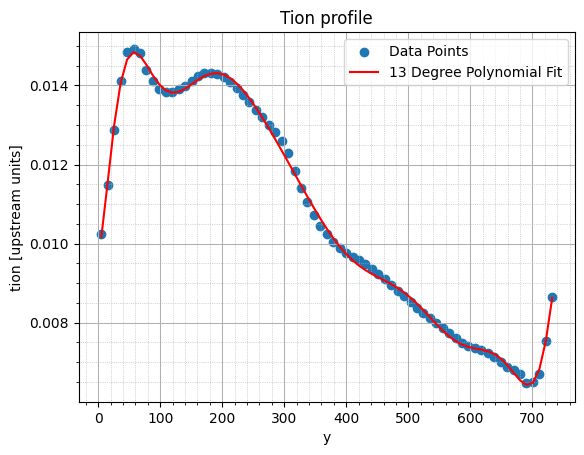

"(-2.6081e-34)*x1^13 + (1.2788e-30)*x1^12 + (-2.7860e-27)*x1^11 + (3.5548e-24)*x1^10 + (-2.9475e-21)*x1^9 + (1.6651e-18)*x1^8 + (-6.5289e-16)*x1^7 + (1.7733e-13)*x1^6 + (-3.2614e-11)*x1^5 + (3.8559e-09)*x1^4 + (-2.6274e-07)*x1^3 + (7.646e-06)*x1^2 + (5.0137e-05)*x1^1 + (9.7479e-03)*x1^0",


In [20]:
tion = np.array(piston_ray[('flash','tion')])/Ti_0.value*osiris['Tpiston']

degree = 13
coefficients = np.polyfit(piston, tion, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# (Optional) Plotting

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(piston)

# Plot the original data points
plt.scatter(piston, tion, label='Data Points')

# Plot the polynomial fit
plt.plot(piston, y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel('y')
plt.ylabel('tion [upstream units]')
pretty_plot()

plt.title('Tion profile')
plt.legend()
plt.show()

result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_scientific(coefficients[i],4)})*x1^"+str(degree-i) + " +"
print('\"'+result.strip(' +') + '\",')

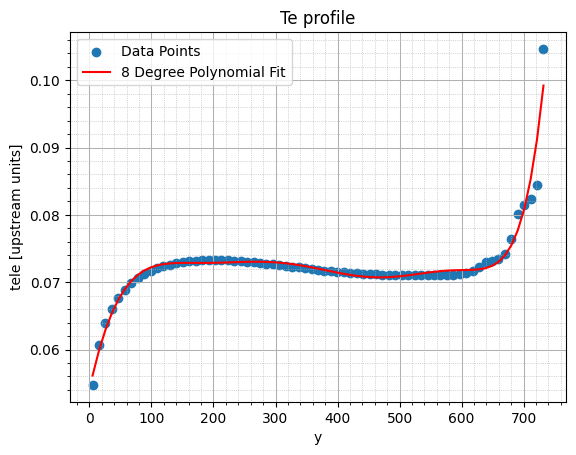

(0.000000)*((x1 - 5.047839)/726.985404)^(8) + (-0.000000)*((x1 - 5.047839)/726.985404)^(7) + (0.000000)*((x1 - 5.047839)/726.985404)^(6) + (-0.000000)*((x1 - 5.047839)/726.985404)^(5) + (0.000000)*((x1 - 5.047839)/726.985404)^(4) + (0.000000)*((x1 - 5.047839)/726.985404)^(3) + (-0.000004)*((x1 - 5.047839)/726.985404)^(2) + (0.000427)*((x1 - 5.047839)/726.985404)^(1) + (0.054077)*((x1 - 5.047839)/726.985404)^(0)",
(0.000000)*((x - 5.047839)/726.985404)^8 + (-0.000000)*((x - 5.047839)/726.985404)^7 + (0.000000)*((x - 5.047839)/726.985404)^6 + (-0.000000)*((x - 5.047839)/726.985404)^5 + (0.000000)*((x - 5.047839)/726.985404)^4 + (0.000000)*((x - 5.047839)/726.985404)^3 + (-0.000004)*((x - 5.047839)/726.985404)^2 + (0.000427)*((x - 5.047839)/726.985404)^1 + (0.054077)*((x - 5.047839)/726.985404)^0


In [46]:
tele = np.array(piston_ray[('flash','tele')])/Te_0.value*osiris['Te']

degree = 8
precision = 6
coefficients = np.polyfit(piston, tele, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# (Optional) Plotting

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(piston)

# Plot the original data points
plt.scatter(piston, tele, label='Data Points')

# Plot the polynomial fit
plt.plot(piston, y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel('y')
plt.ylabel('tele [upstream units]')
pretty_plot()

plt.title('Te profile')
plt.legend()
plt.show()

# OSIRIS FORMATTING
result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_positional(coefficients[i], precision=precision, sign=False)})*((x1 - {round(piston[0],precision)})/{round(piston[-1]-piston[0],precision)})^("+str(degree-i) + ") +"
print(f"{result.strip(' +')}\",")

# DESMOS FORMATTING
result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_positional(coefficients[i],precision)})*((x - {round(piston[0],precision)})/{round(piston[-1]-piston[0],precision)})^"+str(degree-i) + " +"
print(result.strip(' +'))

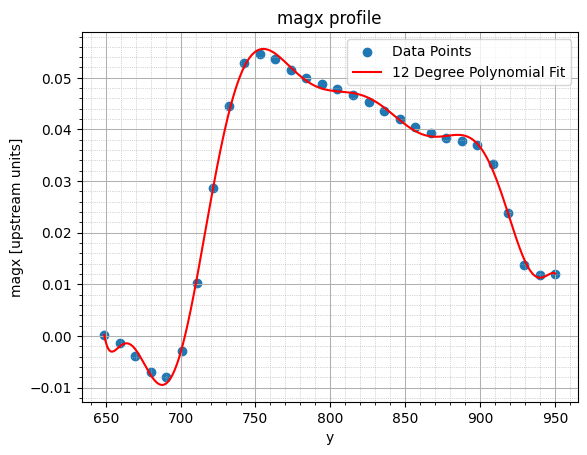

"if(x1 < 648.949197, 0, if(x1 < 950.128865, 
(2953.941905)*((x1 - 648.949197)/301.179668)^(12) + (-23812.095235)*((x1 - 648.949197)/301.179668)^(11) + (80631.466837)*((x1 - 648.949197)/301.179668)^(10) + (-152549.834185)*((x1 - 648.949197)/301.179668)^(9) + (179252.987828)*((x1 - 648.949197)/301.179668)^(8) + (-136659.123891)*((x1 - 648.949197)/301.179668)^(7) + (68215.681724)*((x1 - 648.949197)/301.179668)^(6) + (-21867.042992)*((x1 - 648.949197)/301.179668)^(5) + (4271.223426)*((x1 - 648.949197)/301.179668)^(4) + (-460.361347)*((x1 - 648.949197)/301.179668)^(3) + (23.649351)*((x1 - 648.949197)/301.179668)^(2) + (-0.481577)*((x1 - 648.949197)/301.179668)^(1) + (0.000259)*((x1 - 648.949197)/301.179668)^(0), 0.012))",
(2953.941905)*((x - 648.949197)/301.179668)^12 + (-23812.095235)*((x - 648.949197)/301.179668)^11 + (80631.466837)*((x - 648.949197)/301.179668)^10 + (-152549.834185)*((x - 648.949197)/301.179668)^9 + (179252.987828)*((x - 648.949197)/301.179668)^8 + (-136659.123891)*((x -

In [44]:
import numpy as np
import matplotlib.pyplot as plt



degree = 12

precision = degree-6
start_pt = (0.0, 0.133, 0.0)
end_pt = (0, 0.19, 0)
ray = ds.ray(start_pt, end_pt)

y = (np.array(ray['flash', 'y']) - 0.01) / osiris['length']
y_norm = (y - y[0])/round(y[-1] - y[0],precision)
magx = (np.array(ray[('flash', 'magx')])) / Bx_0.value * osiris['B']
coefficients = np.polyfit(y_norm, magx, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# Calculate y values for the plotting range using the polynomial function
y_smooth = np.linspace(y_norm[0], y_norm[-1], 1000)
y_fit = polynomial_function(y_smooth)

# Plot the original data points
plt.scatter(y, magx, label='Data Points')

# Plot the polynomial fit
plt.plot(y_smooth*(y[-1]-y[0]) + y[0], y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel('y')
plt.ylabel('magx [upstream units]')
pretty_plot()

plt.title('magx profile')
plt.legend()
plt.show()

# OSIRIS FORMATTING
print(f"\"if(x1 < {round(y[0],precision)}, 0, if(x1 < {round(y[-1],precision)}, ")
result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_positional(coefficients[i], precision=precision, sign=False)})*((x1 - {round(y[0],precision)})/{round(y[-1]-y[0],precision)})^("+str(degree-i) + ") +"
print(result.strip(' +')+f", {round(osiris['B'],precision+2)}))\",")

# DESMOS FORMATTING
result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_positional(coefficients[i],precision)})*((x - {round(y[0],precision)})/{round(y[-1]-y[0],precision)})^"+str(degree-i) + " +"
print(result.strip(' +'))


In [23]:
def make_Ex(field, data):
    Ex = data['flash','velz']*data["flash","magy"]-data["flash","vely"]*data["flash","magz"]
    return Ex

def make_Ey(field, data):
    Ey = data['flash','velx']*data["flash","magz"]-data["flash","velz"]*data["flash","magx"]
    return Ey

def make_Ez(field, data):
    Ez = data['flash','vely']*data["flash","magx"]-data["flash","velx"]*data["flash","magy"]
    return Ez

ds.add_field(("flash", "Ex"), function=make_Ex, units="code_magnetic*code_length/code_time",sampling_type="cell") #technically the units are wrong here
ds.add_field(("flash", "Ey"), function=make_Ey, units="code_magnetic*code_length/code_time",sampling_type="cell")
ds.add_field(("flash", "Ez"), function=make_Ez, units="code_magnetic*code_length/code_time",sampling_type="cell")

yt : [INFO     ] 2024-08-20 15:01:01,938 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-20 15:01:01,939 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-08-20 15:01:01,940 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-20 15:01:01,941 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-08-20 15:01:01,942 Making a fixed resolution buffer of (('flash', 'Ez')) 800 by 800



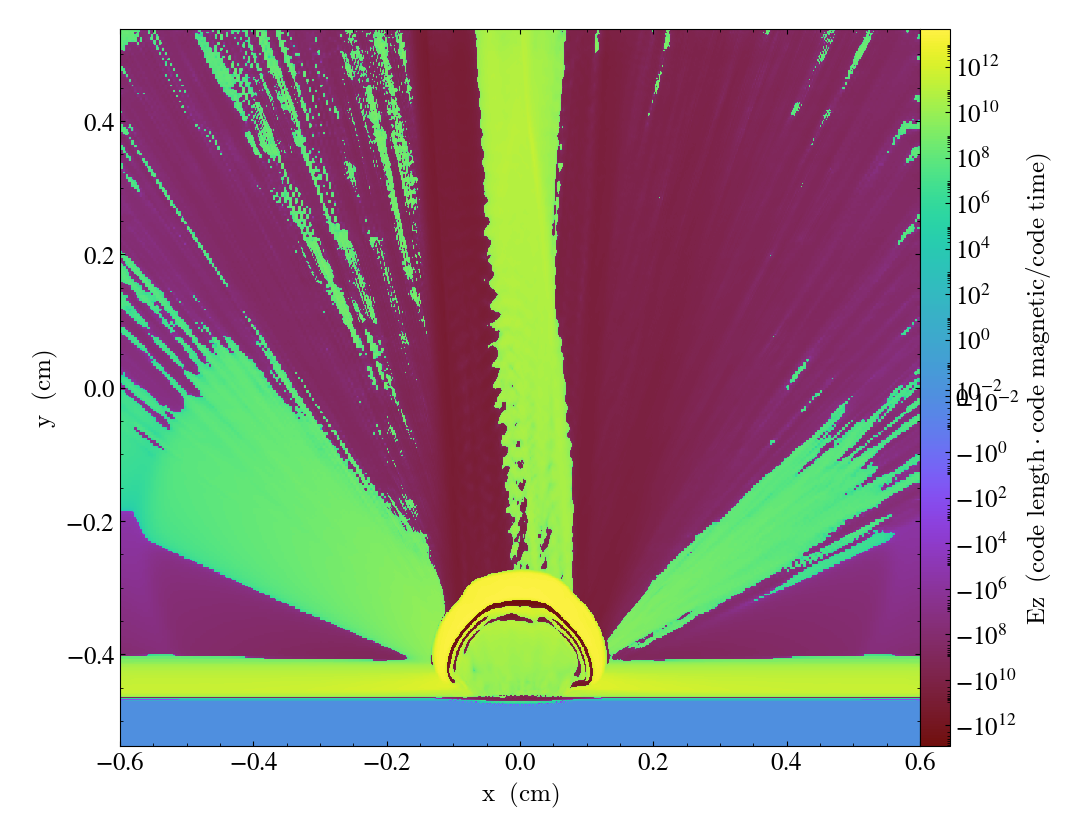

In [24]:
yt.SlicePlot(ds, 'z', ('flash', 'Ez')).show()


[0.         0.03448276 0.06896552 0.10344828 0.13793103 0.17241379
 0.20689655 0.24137931 0.27586207 0.31034483 0.34482759 0.37931034
 0.4137931  0.44827586 0.48275862 0.51724138 0.55172414 0.5862069
 0.62068965 0.65517241 0.68965517 0.72413793 0.75862069 0.79310345
 0.82758621 0.86206896 0.89655172 0.93103448 0.96551724 1.        ]


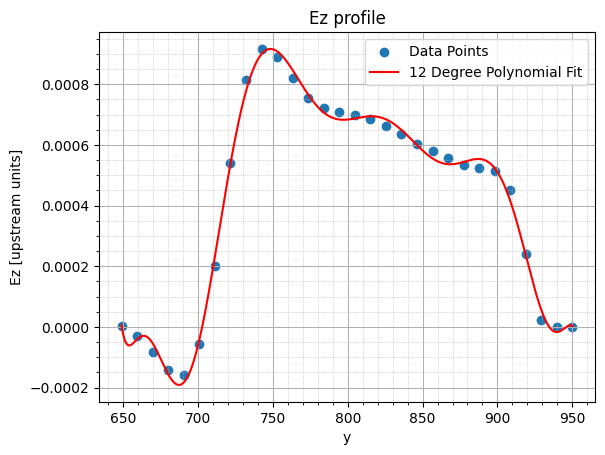

"if((x1 > 648.949197) && (x1 < 950.128865), 
(75.068685)*((x1 - 648.949197)/301.179668)^(12) + (-583.429513)*((x1 - 648.949197)/301.179668)^(11) + (1923.058801)*((x1 - 648.949197)/301.179668)^(10) + (-3559.592924)*((x1 - 648.949197)/301.179668)^(9) + (4102.940709)*((x1 - 648.949197)/301.179668)^(8) + (-3071.821112)*((x1 - 648.949197)/301.179668)^(7) + (1506.053573)*((x1 - 648.949197)/301.179668)^(6) + (-474.026752)*((x1 - 648.949197)/301.179668)^(5) + (90.904481)*((x1 - 648.949197)/301.179668)^(4) + (-9.633774)*((x1 - 648.949197)/301.179668)^(3) + (0.487641)*((x1 - 648.949197)/301.179668)^(2) + (-0.009816)*((x1 - 648.949197)/301.179668)^(1) + (0.000005)*((x1 - 648.949197)/301.179668)^(0), 1.5e-05)",


In [42]:
degree = 12
precision = degree-6
start_pt = (0.0,0.133,0.0); end_pt = (0,0.19,0)
ray = ds.ray(start_pt, end_pt)

y = (np.array(ray['flash','y'])-0.01)/osiris['length']
y_norm = (y-y[0])/round(y[-1]-y[0],precision)
print(y_norm)
Ez = (np.array(ray[('flash','Ez')]))/Bx_0.value*osiris['B']/v_alfven*osiris['alfven_speed']
coefficients = np.polyfit(y_norm, Ez, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)


# Calculate y values for the plotting range using the polynomial function
y_smooth = np.linspace(y_norm[0],y_norm[-1],10000)
y_fit = polynomial_function(y_smooth)

# Plot the original data points
plt.scatter(y, Ez, label='Data Points')

# Plot the polynomial fit
plt.plot(y_smooth*round(y[-1]-y[0],precision)+y[0], y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel('y')
plt.ylabel('Ez [upstream units]')
pretty_plot()

plt.title('Ez profile')
plt.legend()
plt.show()


# OSIRIS FORMATTING
print(f"\"if((x1 > {round(y[0],precision)}) && (x1 < {round(y[-1],precision)}), ")
result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_positional(coefficients[i],precision,sign=False)})*((x1 - {round(y[0],precision)})/{round(y[-1]-y[0],precision)})^("+str(degree-i) + ") +"
print(result.strip(' +')+f", {round(osiris['B']*osiris['alfven_speed'],precision)})\",")

# DESMOS FORMATTING
# result = ''
# for i in range(len(coefficients)):
#     result = f"{result} ({np.format_float_positional(coefficients[i],precision)})*((x - {round(y[0],precision)})/{round(y[-1]-y[0],precision)})^"+str(degree-i) + " +"
# print(result.strip(' +'))
